In [55]:
import numpy as np
import pandas as pd

def calculate_reorientation_events_with_time(file_path):
    # Read the CSV data
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])

    # Extract smoothed coordinates and time values
    x = np.array(data['x_smooth'])
    y = np.array(data['y_smooth'])
    z = np.array(data['z_smooth'])
    time = np.array(data['time'])
    
    # Calculate the directional vectors
    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)
    
    # Calculate angles between consecutive vectors
    magnitudes = np.sqrt(dx**2 + dy**2 + dz**2)
    unit_vectors = np.column_stack((dx / magnitudes, dy / magnitudes, dz / magnitudes))
    angles = np.degrees(np.arccos(np.clip(np.sum(unit_vectors[:-1] * unit_vectors[1:], axis=1), -1.0, 1.0)))

    # Calculate midpoint times for each angle
    mid_times = (time[1:-1] + time[2:]) / 2
    
    # Combine angles and times into one array
    combined_array = np.column_stack((mid_times, angles))
    
    mid_times = combined_array[:, 0]
    angles = combined_array[:, 1]

# Plotting
    plt.plot(mid_times, angles)
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (degrees)')
    plt.title('Reorientation Angle vs Time')
    plt.grid(True)
    plt.show()
    
    return combined_array





In [56]:
data = pd.read_csv('FINALDATA/Split_Data/WT/swimming_WT/track10378_0_processed.txt', delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])

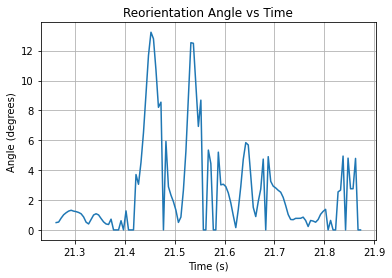

In [57]:
results = calculate_reorientation_events_with_time('FINALDATA/Split_Data/WT/swimming_WT/track107887_0_processed.txt')

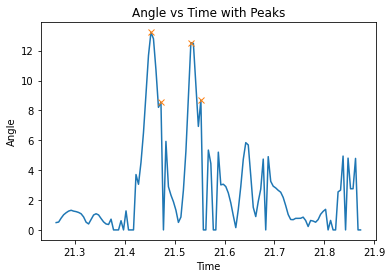

In [58]:
mid_times = results[:, 0]
angles = results[:, 1]
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Assuming 'angles' is your array of angle data
peaks, _ = find_peaks(angles, height = 8)

# Plotting the angle data and marking the peaks
plt.plot(mid_times, angles)
plt.plot(mid_times[peaks], angles[peaks], "x")  # Marking the peaks
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Angle vs Time with Peaks')
plt.show()

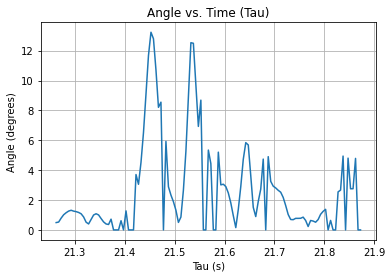

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def angle_vs_tau(file_path):
    # Read the CSV data
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])

    # Extract smoothed coordinates and time values
    x = np.array(data['x_smooth'])
    y = np.array(data['y_smooth'])
    z = np.array(data['z_smooth'])
    time = np.array(data['time'])
    
    # Calculate the directional vectors
    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)
    
    # Calculate angles between consecutive vectors
    magnitudes = np.sqrt(dx**2 + dy**2 + dz**2)
    unit_vectors = np.column_stack((dx / magnitudes, dy / magnitudes, dz / magnitudes))
    angles = np.degrees(np.arccos(np.clip(np.sum(unit_vectors[:-1] * unit_vectors[1:], axis=1), -1.0, 1.0)))

    # Calculate midpoint times for each angle
    mid_times = (time[1:-1] + time[2:]) / 2  # Corresponding midpoints of the tau intervals

    # Plot angle vs. tau (time in seconds)
    plt.plot(mid_times, angles)
    plt.xlabel('Tau (s)')
    plt.ylabel('Angle (degrees)')
    plt.title('Angle vs. Time (Tau)')
    plt.grid(True)
    plt.show()

# Call the function with the file path
angle_vs_tau('FINALDATA/Split_Data/WT/swimming_WT/track107887_0_processed.txt')



62


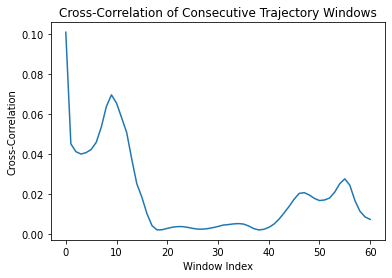

In [68]:
import numpy as np
import pandas as pd
from scipy.signal import correlate
import matplotlib.pyplot as plt

def calculate_cross_correlation(file_path, window_size=2):
    # Read the CSV data
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])

    # Extract smoothed coordinates and time values
    x = np.array(data['x_smooth'])
    y = np.array(data['y_smooth'])
    z = np.array(data['z_smooth'])
    
    # Create direction vectors
    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)

    # Split the trajectory into windows
    num_windows = len(x) // window_size
    cross_corr_values = []
    print(num_windows)
    for i in range(1, num_windows):
        window_a = np.column_stack((dx[i*window_size : (i+1)*window_size], 
                                    dy[i*window_size : (i+1)*window_size], 
                                    dz[i*window_size : (i+1)*window_size]))
        window_b = np.column_stack((dx[(i-1)*window_size : i*window_size], 
                                    dy[(i-1)*window_size : i*window_size], 
                                    dz[(i-1)*window_size : i*window_size]))
        
        # Compute the cross-correlation between windows
        corr_x = correlate(window_a[:, 0], window_b[:, 0], mode='valid')
        corr_y = correlate(window_a[:, 1], window_b[:, 1], mode='valid')
        corr_z = correlate(window_a[:, 2], window_b[:, 2], mode='valid')
        
        # Combine the correlations for all components (x, y, z)
        corr = np.sqrt(corr_x**2 + corr_y**2 + corr_z**2)
        cross_corr_values.append(np.max(corr))
    
    # Check if cross_corr_values is not empty
    if len(cross_corr_values) > 0:
        plt.plot(cross_corr_values)
        plt.xlabel('Window Index')
        plt.ylabel('Cross-Correlation')
        plt.title('Cross-Correlation of Consecutive Trajectory Windows')
        plt.show()
    else:
        print("No cross-correlation values calculated. Check the window size and data.")

    return cross_corr_values

# Example usage
file_path = 'FINALDATA/Split_Data/WT/swimming_WT/track107887_0_processed.txt'  # Replace with your actual file path
cross_corr_values = calculate_cross_correlation(file_path)
